In [1]:
# Engineering Data Analysis & Visualisation Tool (Python)
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load and partial display of data
df = pd.read_csv("data/lap_sensitivity.csv")
df.head()

,mass_kg,tyre_mu,aero_balance_front,lap_time_s
0,680,1.85,0.44,92.40
1,700,1.85,0.44,93.10
2,720,1.85,0.44,93.90
3,680,1.75,0.44,94.10
4,700,1.75,0.44,94.85


In [3]:
print(df.shape)
print(df.dtypes)

# Example derived metric: lap time delta relative to theoretical best
best = df["lap_time_s"].min()
df["delta_to_best_s"] = df["lap_time_s"] - best

# Set to 3 decimal places
pd.options.display.float_format = "{:.3f}".format

# Display summary statistics for all columns
df.describe()

(18, 4)
mass_kg                 int64
tyre_mu               float64
aero_balance_front    float64
lap_time_s            float64
dtype: object


,mass_kg,tyre_mu,aero_balance_front,lap_time_s,delta_to_best_s
count,18.000,18.000,18.000,18.000,18.000
mean,700.000,1.800,0.440,94.283,1.883
std,16.803,0.051,0.017,1.153,1.153
min,680.000,1.750,0.420,92.400,0.000
25%,680.000,1.750,0.420,93.438,1.037
50%,700.000,1.800,0.440,94.325,1.925
75%,720.000,1.850,0.460,95.112,2.712
max,720.000,1.850,0.460,96.250,3.850


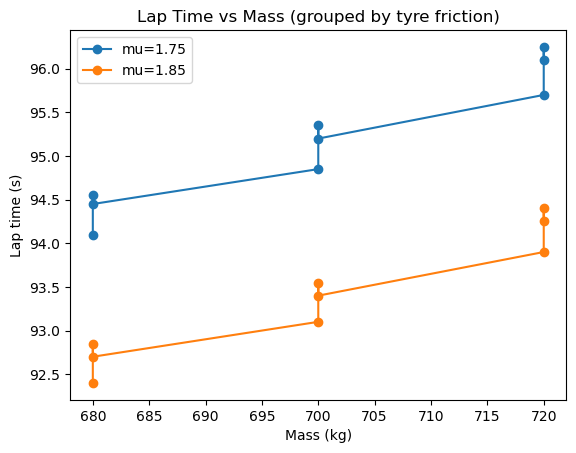

In [4]:
# Create figure for the plot
plt.figure()

# Loop through each tyre friction level and plot a separate curve
for mu, g in df.groupby("tyre_mu"):

    # Sort data by mass for plot
    g_sorted = g.sort_values("mass_kg")

    # Plot lap time against mass for this tyre friction value
    plt.plot(g_sorted["mass_kg"], g_sorted["lap_time_s"], marker="o", label=f"mu={mu}")

# # Label axes and add title
plt.xlabel("Mass (kg)")
plt.ylabel("Lap time (s)")
plt.title("Lap Time vs Mass (grouped by tyre friction)")

# Show legend to distinguish tyre friction curves
plt.legend()

plt.show()

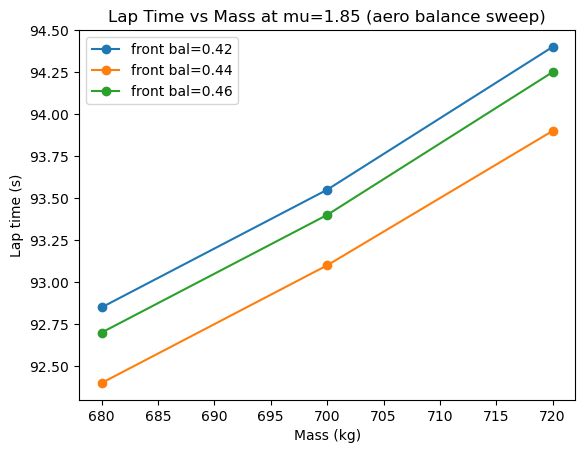

In [5]:
# Select only the data corresponding to tyre friction mu = 1.85
subset = df[df["tyre_mu"] == 1.85].copy()

# Create a new figure for the plot
plt.figure()

# Loop through each aerodynamic balance value and plot a curve
for bal, g in subset.groupby("aero_balance_front"):

    # Sort data by mass for plot
    g_sorted = g.sort_values("mass_kg")

    # Plot lap time against mass for this aerodynamic balance
    plt.plot(g_sorted["mass_kg"], g_sorted["lap_time_s"], marker="o", label=f"front bal={bal:.2f}")

# Label axes and add title
plt.xlabel("Mass (kg)")
plt.ylabel("Lap time (s)")
plt.title("Lap Time vs Mass at mu=1.85 (aero balance sweep)")

# Show legend to distinguish aerodynamic balance curves
plt.legend()

plt.show()

In [6]:
# Create an empty list to store sensitivity results
sens = []

# Loop through each tyre friction level
for mu, g in df.groupby("tyre_mu"):
    
    # Fit a straight line: lap_time = a * mass + b
    # a represents lap time sensitivity to mass (seconds per kg)
    a, b = np.polyfit(g["mass_kg"], g["lap_time_s"], 1)

    # Store sensitivity results for this tyre friction value
    sens.append({"tyre_mu": mu, "sec_per_kg": a, "sec_per_10kg": a*10})

# Convert results into a DataFrame and display them
pd.DataFrame(sens).sort_values("tyre_mu", ascending=False)

,tyre_mu,sec_per_kg,sec_per_10kg
1,1.850,0.038,0.383
0,1.750,0.041,0.413
